#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/precio-portatiles-the-bridge/overview

## Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from Funciones import *

## Data

- Variable a predecir: Price_euros

- Variables predictoras: por defenir

- Variables a desechar: laptop_ID, 

In [2]:
df_test = pd.read_csv('../data/test.csv', index_col=0)
df_test

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,,
181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...
1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg


In [3]:
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,,,
268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00


In [4]:
sample = pd.read_csv('../data/sample_submission.csv')
sample

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0
...,...,...
386,1162,258.0
387,1286,1085.0
388,336,298.0
389,885,1099.0


## Data exploration

In [5]:
df_train['TypeName'].nunique()

6

In [6]:
df_train['TypeName'].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [7]:
df_train['OpSys'].value_counts()

OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

## Data processing

## Test

In [8]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_test = df_test.rename(columns={'Weight': 'Weight/kg'})

In [9]:
print (df_test.columns)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight/kg'],
      dtype='object')


In [10]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2_t = df_test.drop(['laptop_ID'], axis=1)

# Voy a ver si puedo sacarle provecho al typeName
# df2_t = df2_t.drop(['TypeName'], axis=1)

In [11]:
print (df2_t.columns)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight/kg'],
      dtype='object')


In [12]:
# Función que agrupa OS
def group_os(name):
    if 'Windows' in name:
        return 'Windows'
    elif re.search(r'mac', name, re.IGNORECASE):
        return 'Mac'
    elif name in ['Linux', 'Chrome OS', 'Android']:
        return 'Other OS'
    else:
        return 'No OS/Other'

In [13]:
df2_t['TypeName'].value_counts()

TypeName
Notebook              205
Gaming                 67
Ultrabook              61
2 in 1 Convertible     36
Workstation            11
Netbook                11
Name: count, dtype: int64

In [14]:
# Agrupo varias variables
df2_t['OpSys_Grouped'] = df2_t['OpSys'].apply(group_os)
df2_t['Company_Grouped'] = df2_t['Company'].apply(agrupar_marcas)

In [15]:
# #  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
# df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName', "OpSys_Grouped", "Company_Grouped"])

In [16]:
df2_t['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                161
1366x768                                          73
IPS Panel Full HD 1920x1080                       67
IPS Panel Full HD / Touchscreen 1920x1080         16
Full HD / Touchscreen 1920x1080                   15
1600x900                                          12
Quad HD+ / Touchscreen 3200x1800                   7
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      3
Touchscreen 2560x1440                              3
Touchscreen 2256x1504                              3
IPS Panel Quad HD+ / Touchscreen 3200x1800         2
4K Ultra HD 3840x2160                              2
1440x900                                           2
IPS Panel Quad HD+ 2560x1440                       2
4K Ultra HD / Touchscreen 3840x2160                2
IPS Panel Touchscreen 1366x768                     2
IPS Panel 4K Ultra HD 3840x2160                    2
IPS Panel 1366x768                                 2
IPS Panel Retina Display 2560

In [17]:
# Extraigo los pixeles
def extraer_pixeles(resolucion):
    # Busca dos números separados por 'x' o 'X'
    match = re.search(r'(\d+)x(\d+)', resolucion, re.IGNORECASE)
    if match:
        ancho, alto = map(int, match.groups())
        return ancho * alto
    else:
        return None  # O un valor por defecto, como 0 o -1


In [18]:
# Función extrae los screen featuring
def screen_featuring(row):
    ips = 'IPS' in row
    touchscreen = 'Touchscreen' in row
    return pd.Series([ips, touchscreen])

In [19]:
# Extraer los píxeles
df2_t['Pixeles_Total'] = df2_t['ScreenResolution'].apply(extraer_pixeles)

# Extraer características de la pantalla
df2_t[['IPS', 'Touchscreen']] = df2_t['ScreenResolution'].apply(screen_featuring)


In [20]:
df2_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 181 to 1036
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    int32  
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight/kg         391 non-null    float64
 11  OpSys_Grouped     391 non-null    object 
 12  Company_Grouped   391 non-null    object 
 13  Pixeles_Total     391 non-null    int64  
 14  IPS               391 non-null    bool   
 15  Touchscreen       391 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(1), ob

In [21]:
#  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
# df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName', "OpSys_Grouped", "Company_Grouped"])
df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName'])
df_encoded_test

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,...,Company_Grouped,Pixeles_Total,IPS,Touchscreen,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
id,,,,,,,,,,,,,,,,,,,,,
181,HP,Spectre x360,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,...,HP,8294400,True,False,False,False,False,False,True,False
708,Acer,Aspire 5,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,...,Acer,1049088,False,False,False,False,False,True,False,False
862,Acer,Aspire ES1-572,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,...,Acer,1049088,False,False,False,False,False,True,False,False
1064,HP,EliteBook 1040,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,...,HP,2073600,False,False,False,False,False,True,False,False
702,HP,ENVY -,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,...,HP,2073600,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Lenovo,Legion Y520-15IKBN,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,...,Lenovo,2073600,True,False,False,True,False,False,False,False
524,Lenovo,IdeaPad Y700-15ISK,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,...,Lenovo,2073600,True,False,False,True,False,False,False,False
1015,HP,250 G5,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,...,HP,1049088,False,False,False,False,False,True,False,False


## Train

In [22]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_train['Ram'] = df_train['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_train['Weight'] = df_train['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_train = df_train.rename(columns={'Weight': 'Weight/kg'})

In [23]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2 = df_train.drop(['laptop_ID'], axis=1)

# Voy a ver si puedo sacarle provecho al typeName
# df2 = df2.drop(['TypeName'], axis=1)

In [24]:
# Agrupo varias variables
df2['OpSys_Grouped'] = df2['OpSys'].apply(group_os)
df2['Company_Grouped'] = df2['Company'].apply(agrupar_marcas)

# Extraigo y creo otras variables
# Extraer los píxeles
df2['Pixeles_Total'] = df2['ScreenResolution'].apply(extraer_pixeles)

# Extraer características de la pantalla
df2[['IPS', 'Touchscreen']] = df2['ScreenResolution'].apply(screen_featuring)


In [25]:
#  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
df_encoded_train = pd.get_dummies(df2, columns=['TypeName'])
df_encoded_train

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,...,Company_Grouped,Pixeles_Total,IPS,Touchscreen,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Inspiron 5567,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,...,Dell,1049088,False,False,False,False,False,True,False,False
347,Asus,X541NA (N4200/4GB/1TB/W10),15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,...,Asus,1049088,False,False,False,False,False,True,False,False
353,Toshiba,Portege Z30-C-1CW,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,...,Toshiba,2073600,False,False,False,False,False,True,False,False
578,Dell,Alienware 17,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,...,Dell,8294400,True,False,False,True,False,False,False,False
42,Dell,Latitude E7270,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,...,Dell,2073600,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Acer,Chromebook C738T-C2EJ,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,...,Acer,1049088,True,True,True,False,False,False,False,False
716,Toshiba,Portege Z30-C-16H,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,...,Toshiba,2073600,False,False,False,False,False,True,False,False
517,Acer,Aspire ES1-523,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.40,...,Acer,1049088,False,False,False,False,False,True,False,False


In [26]:
print (df_encoded_train.columns)

Index(['Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight/kg', 'Price_euros', 'OpSys_Grouped',
       'Company_Grouped', 'Pixeles_Total', 'IPS', 'Touchscreen',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')


In [27]:
m_corr = df_encoded_train[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen', 'Price_euros']].corr()

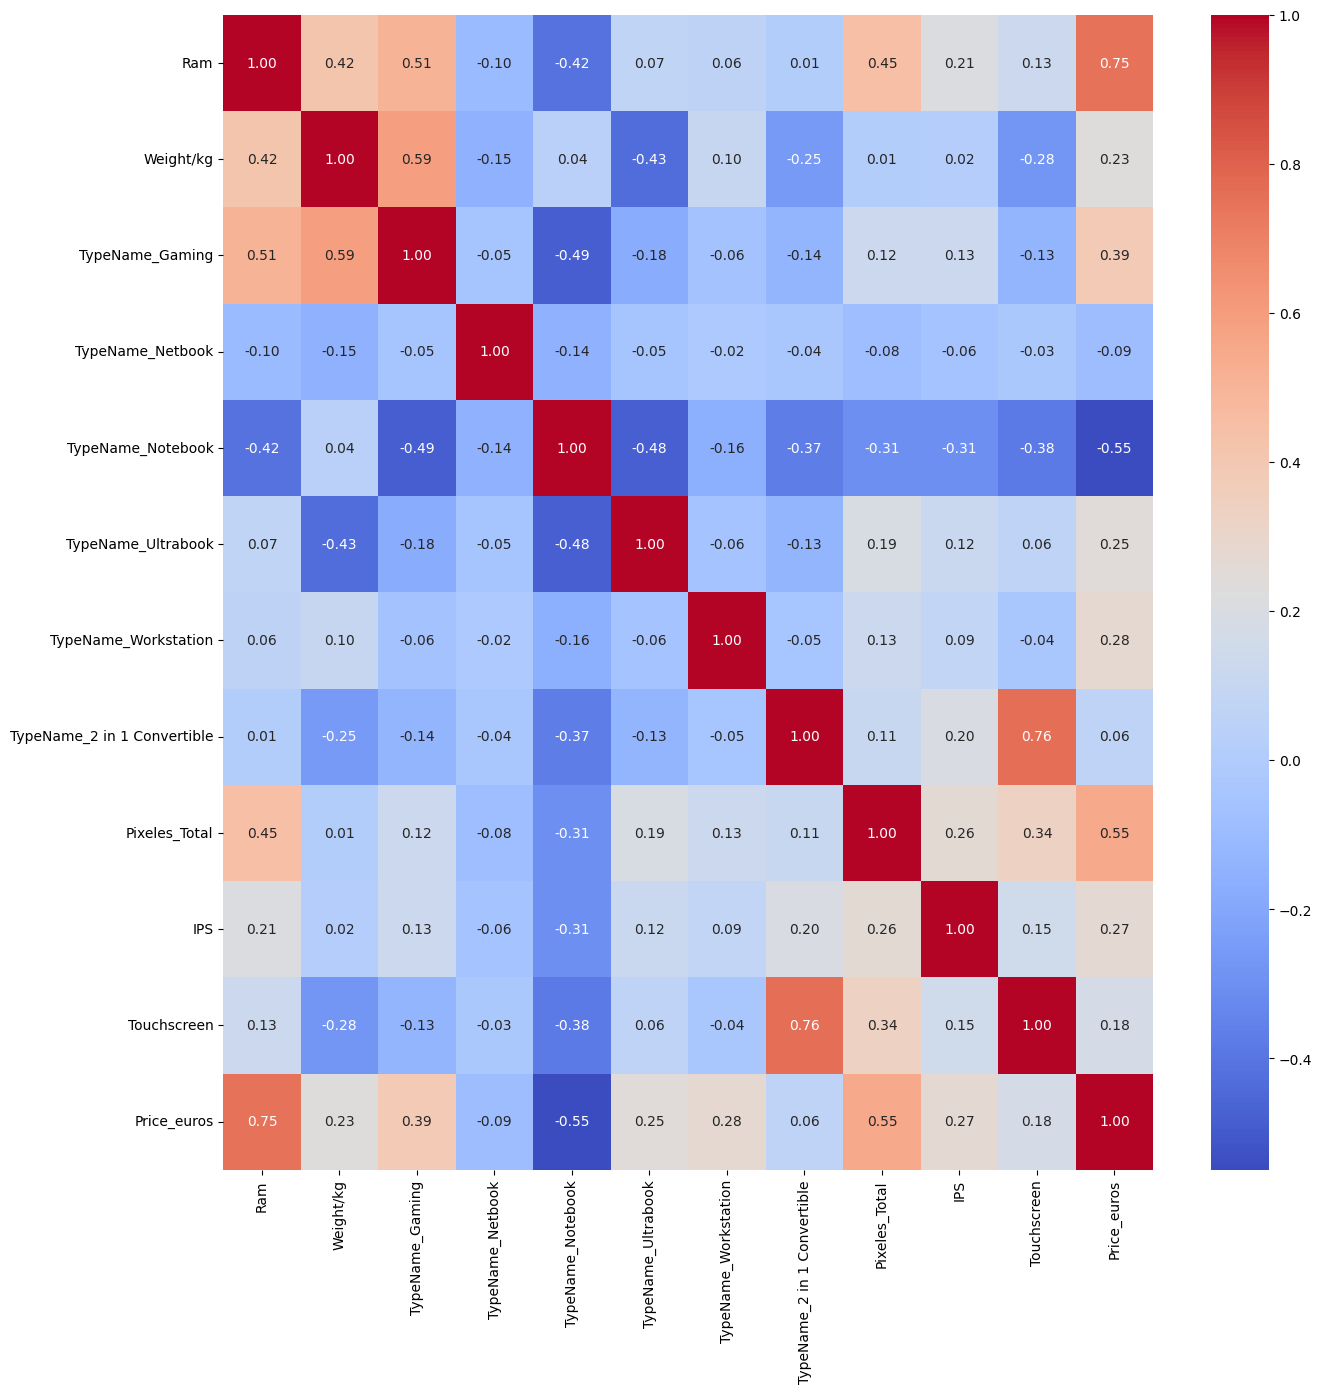

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(m_corr, annot=True, fmt=".2f", annot_kws={'size': 10}, cmap='coolwarm');

In [29]:
"""Corregí un fallo que tenía al agrupar los sistemas operativos, algunos de Mac los estaba enviando a OS """
# df2[df2['OpSys_Grouped'] == 'Mac']
# # df2[df2['Company']== 'Apple']

'Corregí un fallo que tenía al agrupar los sistemas operativos, algunos de Mac los estaba enviando a OS '

In [30]:
# sns.heatmap(df_encoded[['TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Price_euros']].corr(), annot= True)

In [31]:
# sns.heatmap(df_encoded.corr(numeric_only=True), annot= True, cmap='coolwarm')

In [32]:
# df_encoded['Gpu'].unique()

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [34]:
df_encoded_train.columns

Index(['Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight/kg', 'Price_euros', 'OpSys_Grouped',
       'Company_Grouped', 'Pixeles_Total', 'IPS', 'Touchscreen',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')

In [35]:
X = df_encoded_train.drop(['Price_euros'], axis=1)
y = df_encoded_train['Price_euros']

### 2. Dividir X_train, X_test, y_train, y_test

In [36]:
X_train = df_encoded_train[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen']]
X_test = df_encoded_test[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen']]
y_train = y
y_test = sample['Price_euros']

### 3. Crear y entrenar el modelo


In [37]:
#creating LinearRegression Object
lm = LinearRegression()
#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
# Hago mis predicciones
predictions = lm.predict(X_test)

In [39]:
predictions

array([2697.00694958,  818.8458737 ,  504.32392362,  911.51021232,
        930.78130645, 1796.10393036, 1839.21048442,  606.77643494,
       5718.54768492, 1317.7680329 , 1400.0250119 ,  493.07793796,
        591.15701042,  596.36348526,  608.85902488, 1161.13178609,
        845.56854104, 1319.01758686, 1166.75477892, 1375.54744293,
       1578.94713941, 1188.38271893, 1564.92041474, 1397.73416297,
       1858.99508882, 1082.16530723,  923.17271597,  493.07793796,
       1223.70341884,  499.74222576, 1302.01088468,  933.48867337,
       1836.08659951,  818.8458737 ,  608.85902488, 1861.07767875,
        927.54615483,  837.90870884, 3186.54440075,  818.8458737 ,
        498.07615381,  917.13320515, 1402.73237882, 1870.35234119,
       1412.10403353, 1504.4060517 ,  607.81772991, 3171.2302275 ,
        500.15874375, 1791.56697923,  950.77416985,  933.79392464,
        921.29838502,  500.15874375, 1150.81582869,  615.2180614 ,
        593.03134136,  326.23704922,  910.05239936, 1207.04269

In [40]:
from sklearn import metrics

lm.score(X_test, y_test)

-0.7740840476041784

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 659.049506285172


In [42]:
from sklearn.metrics import mean_absolute_error

# Ahora voy a escalar a ver si me da mejores resultados

# Ahora voy a escalarlo
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y)
# Hacer predicciones con los datos de prueba escalados
predictions_scaled = lm_scaled.predict(X_test_scaled)

# Evaluar el modelo
print('MAE:', mean_absolute_error(y_test, predictions_scaled))

score_scaled = lm_scaled.score(X_test_scaled, y_test)
print("Coeficiente de determinación (R^2) en datos escalados:", score_scaled)

MAE: 654.4031454352516
Coeficiente de determinación (R^2) en datos escalados: -0.7462392368382906


In [43]:
dicccionario ={'id':df_encoded_test.index,"Price_euros": predictions_scaled}

In [44]:
df_scal = pd.DataFrame(dicccionario)
df_scal

,id,Price_euros
0,181,2691.502096
1,708,820.285696
2,862,498.285696
3,1064,938.134753
4,702,968.718464
...,...,...
386,1281,1270.718464
387,524,1886.718464
388,1015,503.785696
389,1236,608.634753


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

In [45]:
prediction = model.predict(X_pred)
prediction

NameError: name 'model' is not defined

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions = model.predict(X_pred)
predictions

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("Dataset/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
chequeator(df_scal) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!


NameError: name 'submission' is not defined

In [ ]:
df_scal.to_csv('tercer_modelo_scal.csv', index=False)